## Introduction

In this project,we are going to analyse the data of room booking of a hotel stored in a dataset called "Hotel Reservations.csv" and build a model to reduce the cancellations and improve the revenue of the hotel.

## Dataset information

This dataset contains various details such as,

* Booking_ID - Booking id of each booking
* no_of_adults - How many No of adult guests(customers) stayed
* no_of_children - How many No of Children stayed
* no_of_weekend_nights - How many number of weekend nights guests stayed
* no_of_week_nights - How many number of week nights guests stayed
* type_of_meal_plan - Type of meal plan they select
* required_car_parking_space - If the guests required parking space or not
* room_type_reserved - Type of room they reserved
* lead_time - The number of days between the time a guest books their room and the time they are scheduled to arrive at the hotel.
* arrival_year - Guests(Customers) arrived year as per booking
* arrival_month - Guests arrived month as per booking
* arrival_date - Guests arrived date as per booking
* market_segment_type - Ticket booking type(online,offline,corporate)
* repeated_guest - If the guests are repeated or not
* no_of_previous_cancellations - No of previous booking cancellations
* no_of_previous_bookings_not_canceled - No of previous booking non cancellations
* avg_price_per_room - Rent for the room
* no_of_special_requests - Number of special requests customer asked
* booking status - Status of the booking, If the booking was cancelled or not.

## Table of contents

* Import Libraries
* Load dataset
* Summarize the data
* Exploratory Data Analysis(EDA)
    * Check for missing values(NaN values)
    * Cancellation base on lead time
    
    * Start & End month of each year in dataset
    * Number of unique Booking_ID
    * Difference in Sum of avg price per room(Revenue) due to cancellation for 2 years (sepertately for 2017 & 2018 and overall difference)
    * Difference in Total number of adults and children stayed at the hotel (sepertately for 2017 & 2018 and overall difference)
    * Monthwise Cancellation Report
    * Cancellation based on type of meal plan
    * Cancellation count per year.
    * Booking Status counts
    * Cancellation based on market segment type
    * Number of repeated guests cancelled their bookings
    * Categorical data visualization with hue difference of Arrival Year
    * Data visualization with hue difference of booking status
    * Numerical data visualization
    * Coorelation Matrix
* Split the data into test and train
* Data Preprocessing
    * Label Encoding
* Model Building
    * LogisticRegression
    * KNN (K-Nearest Neighbor)
    * RandomForest
    * DecisionTree
    * ExtraTrees
    * SVC (Support Vector Classifier)
    * XGB Classifier
* Model Comparision
* Hyperparameter Tuning

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

## Load dataset

In [2]:
df=pd.read_csv("Hotel Reservations.csv")
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


## Summarize the data

In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [5]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [6]:
df.shape

(36275, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

## Exploratory Data Analysis

### Check for missing values

In [8]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

This "Hotel Reservations.csv" dataset doesn't have any null(NaN) or missing values.

In [9]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### Cancellation based on lead time

In [10]:
df["lead_time"].max()

443

In [11]:
df["lead_time"].count()

36275

In [12]:
#lead time > 90 days (3 months)

In [13]:
print("Total : ",df[df["lead_time"]>90].count().tail(1))
print("Not_Canceled : ",df[(df["lead_time"]>90)&(df["booking_status"]=="Not_Canceled")].count().tail(1))
print("Canceled : ",df[(df["lead_time"]>90)&(df["booking_status"]=="Canceled")].count().tail(1))

Total :  booking_status    13049
dtype: int64
Not_Canceled :  booking_status    5660
dtype: int64
Canceled :  booking_status    7389
dtype: int64


Number of cancellation :  7389
Cancellation Percentage :  56.63


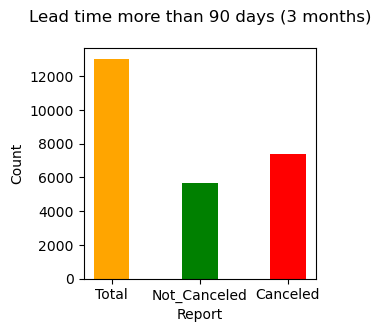

In [14]:
type=["Total","Not_Canceled","Canceled"]
t90=[13049,5660,7389]

print("Number of cancellation : ",t90[2])
cp90= round((t90[2] / t90[0])*100,2)
print("Cancellation Percentage : ",cp90)
plt.figure(figsize=(3,3))
plt.bar(type,t90,width=0.4,color=["orange","green","red"])
plt.title("Lead time more than 90 days (3 months)\n")
plt.xlabel("Report")
plt.ylabel("Count")
plt.show()

In [15]:
#lead time > 180 days (6 months)

In [16]:
print("Total : ",df[df["lead_time"]>180].count().tail(1))
print("Not_Canceled : ",df[(df["lead_time"]>180)&(df["booking_status"]=="Not_Canceled")].count().tail(1))
print("Canceled : ",df[(df["lead_time"]>180)&(df["booking_status"]=="Canceled")].count().tail(1))

Total :  booking_status    5277
dtype: int64
Not_Canceled :  booking_status    1378
dtype: int64
Canceled :  booking_status    3899
dtype: int64


Number of cancellation :  3899
Cancellation Percentage :  73.89


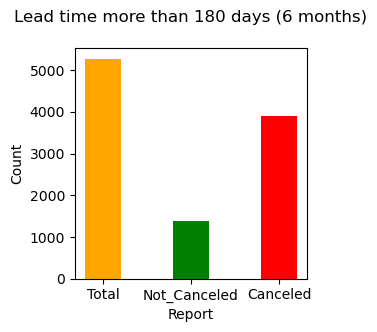

In [17]:
type=["Total","Not_Canceled","Canceled"]
t180=[5277,1378,3899]

print("Number of cancellation : ",t180[2])
cp180=round((t180[2] / t180[0])*100,2)
print("Cancellation Percentage : ",cp180 )
plt.figure(figsize=(3,3))
plt.bar(type,t180,width=0.4,color=["orange","green","red"])
plt.title("Lead time more than 180 days (6 months)\n")
plt.xlabel("Report")
plt.ylabel("Count")
plt.show()

In [18]:
#lead time > 270 days (9 months)

In [19]:
print("Total : ",df[df["lead_time"]>270].count().tail(1))
print("Not_Canceled : ",df[(df["lead_time"]>270)&(df["booking_status"]=="Not_Canceled")].count().tail(1))
print("Canceled : ",df[(df["lead_time"]>270)&(df["booking_status"]=="Canceled")].count().tail(1))

Total :  booking_status    1912
dtype: int64
Not_Canceled :  booking_status    384
dtype: int64
Canceled :  booking_status    1528
dtype: int64


Number of cancellation :  1528
Cancellation Percentage :  79.92


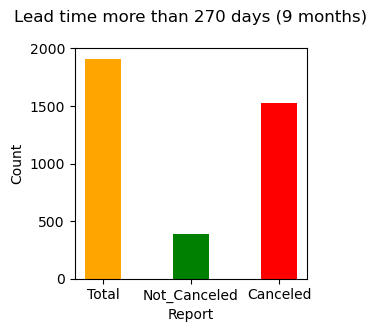

In [20]:
type=["Total","Not_Canceled","Canceled"]
t270=[1912,384,1528]

print("Number of cancellation : ",t270[2])
cp270=round((t270[2] / t270[0])*100,2)
print("Cancellation Percentage : ", cp270)
plt.figure(figsize=(3,3))
plt.bar(type,t270,width=0.4,color=["orange","green","red"])
plt.title("Lead time more than 270 days (9 months)\n")
plt.xlabel("Report")
plt.ylabel("Count")
plt.show()

In [21]:
#lead time > 360 days (12 months)

In [22]:
print("Total : ",df[df["lead_time"]>360].count().tail(1))
print("Not_Canceled : ",df[(df["lead_time"]>360)&(df["booking_status"]=="Not_Canceled")].count().tail(1))
print("Canceled : ",df[(df["lead_time"]>360)&(df["booking_status"]=="Canceled")].count().tail(1),"\n")

Total :  booking_status    248
dtype: int64
Not_Canceled :  booking_status    12
dtype: int64
Canceled :  booking_status    236
dtype: int64 



Number of cancellation :  236
Cancellation Percentage :  95.16


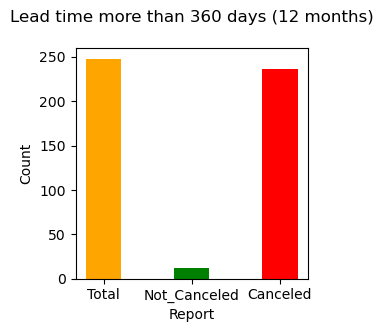

In [23]:
type=["Total","Not_Canceled","Canceled"]
t360=[248,12,236]

print("Number of cancellation : ",t360[2])
cp360=round((t360[2] / t360[0])*100,2)
print("Cancellation Percentage : ",cp360 )
plt.figure(figsize=(3,3))
plt.bar(type,t360,width=0.4,color=["orange","green","red"])
plt.title("Lead time more than 360 days (12 months)\n")
plt.xlabel("Report")
plt.ylabel("Count")
plt.show()

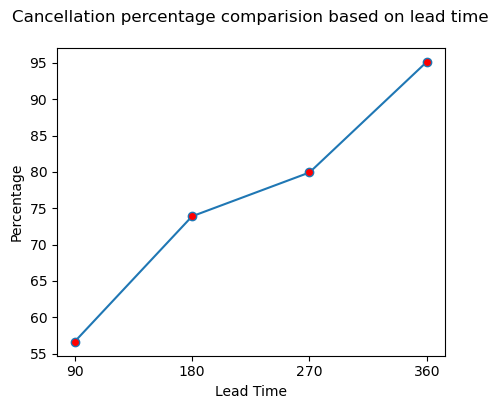

In [24]:
#Cancellation Percentage comparision based on lead time
plt.figure(figsize=(5,4))
lead_time=["90","180","270","360"]
cancel_percentage=[cp90,cp180,cp270,cp360]
plt.plot(lead_time,cancel_percentage,marker="o",ms=6,mfc="red")
plt.title("Cancellation percentage comparision based on lead time\n")
plt.xlabel("Lead Time")
plt.ylabel("Percentage")
plt.show()

### Start & End month of each year in dataset

In [25]:
print("2017 Start month : ",df[df["arrival_year"]==2017]["arrival_month"].min())
print("2017 End month : ",df[df["arrival_year"]==2017]["arrival_month"].max())
print("2018 Start month : ",df[df["arrival_year"]==2018]["arrival_month"].min())
print("2018 End month : ",df[df["arrival_year"]==2018]["arrival_month"].max())

2017 Start month :  7
2017 End month :  12
2018 Start month :  1
2018 End month :  12


We can see that,
* The dataset has the details of hotel reservations from July 2017 to December 2018.
* Year 2017 has only 6 months of reservation data while 2018 has 12 months of reservation data.

### Number of unique Booking_ID

In [26]:
df["Booking_ID"].nunique()

36275

* The number of unique Booking_ID is as same as the number of rows of the dataset.

* So, each booking id is unique

### Difference in Sum of avg price per room(Revenue) due to cancellation for 2 years (sepertately for 2017 & 2018 and overall difference)

Hotel revenue in 2017 without cancellation: 586441.73 

Hotel revenue in 2017 after cancellation: 496483.11 

Difference in Revenue due to cancellation in 2017: 89958.62 



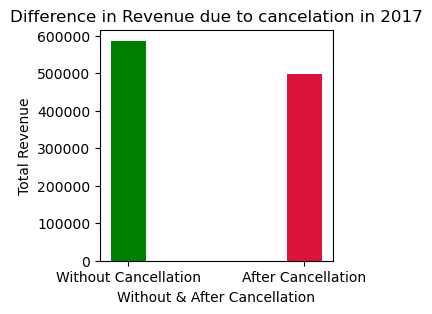

In [27]:
#2017

#Without Cancellation - If the cancellation didn't happened
price_2017w=df[df["arrival_year"]==2017]["avg_price_per_room"].sum()
print("Hotel revenue in 2017 without cancellation:",price_2017w,"\n")

#After Cancellation
price_2017a=df[(df["arrival_year"]==2017)&(df["booking_status"]=="Not_Canceled")]["avg_price_per_room"].sum()
print("Hotel revenue in 2017 after cancellation:",price_2017a,"\n")

#Difference
diff_2017=price_2017w-price_2017a
print("Difference in Revenue due to cancellation in 2017:",diff_2017,"\n")

#plotting
plt.figure(figsize=(3,3))
diff=["Without Cancellation","After Cancellation"]
values=[price_2017w,price_2017a]
colors=["green","crimson"]
plt.bar(diff,values,width=0.2,color=colors)
plt.title("Difference in Revenue due to cancelation in 2017")
plt.xlabel("Without & After Cancellation")
plt.ylabel("Total Revenue")
plt.show()

* Hotel revenue in 2018 without cancellation: 3165247.15 

Hotel revenue in 2018 after cancellation: 1940844.02 

Difference in Revenue due to cancellation in 2018: 1224403.13 



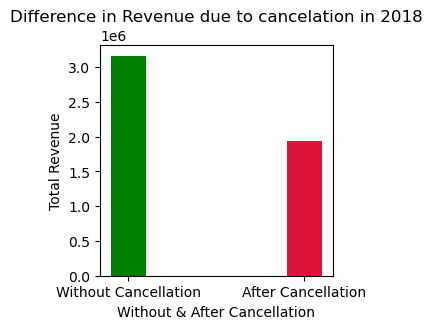

In [28]:
#2018

#Without Cancellation - If cancellation didn't happened
price_2018w=df[df["arrival_year"]==2018]["avg_price_per_room"].sum()
print("* Hotel revenue in 2018 without cancellation:",price_2018w,"\n")

#After Cancellation
price_2018a=df[(df["arrival_year"]==2018)&(df["booking_status"]=="Not_Canceled")]["avg_price_per_room"].sum()
print("Hotel revenue in 2018 after cancellation:",price_2018a,"\n")

#Difference
diff_2018=price_2018w-price_2018a
print("Difference in Revenue due to cancellation in 2018:",diff_2018,"\n")

#Plotting
plt.figure(figsize=(3,3))
diff=["Without Cancellation","After Cancellation"]
values=[price_2018w,price_2018a]
colors=["green","crimson"]
plt.bar(diff,values,width=0.2,color=colors)
plt.title("Difference in Revenue due to cancelation in 2018")
plt.xlabel("Without & After Cancellation")
plt.ylabel("Total Revenue")
plt.show()

Total revenue in 2 years without cancellation: 3751688.88 

Total revenue in 2 years after cancellation: 2437327.13 

Overall Difference in revenue due to cancelation in 2 years: 1314361.75 



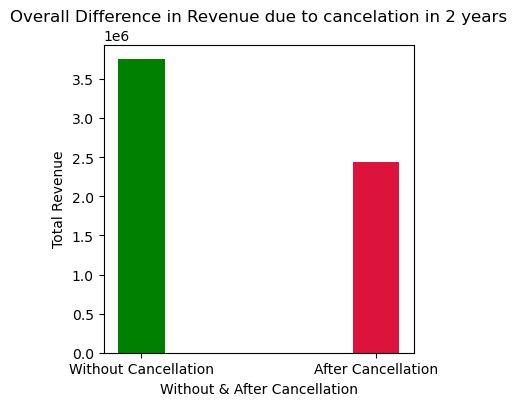

In [29]:
#Overall (2 years)

#Without Cancellation - If cancellation didn't happened
total_price_without_cancellation = price_2017w + price_2018w
print("Total revenue in 2 years without cancellation:",total_price_without_cancellation,"\n")

#After Cancellation
total_price_after_cancellation = price_2017a + price_2018a
print("Total revenue in 2 years after cancellation:",total_price_after_cancellation,"\n")

#Difference
diff = total_price_without_cancellation - total_price_after_cancellation
print("Overall Difference in revenue due to cancelation in 2 years:",diff,"\n")

#Plotting
plt.figure(figsize=(4,4))
diff=["Without Cancellation","After Cancellation"]
values=[total_price_without_cancellation,total_price_after_cancellation]
colors=["green","crimson"]
plt.bar(diff,values,width=0.2,color=colors)
plt.title("Overall Difference in Revenue due to cancelation in 2 years")
plt.xlabel("Without & After Cancellation")
plt.ylabel("Total Revenue")
plt.show()

Totally 1314361.75 rupees of revenue lost due to cancellation.

###  Difference in Total number of adults and children stayed at the hotel (sepertately for 2017 & 2018 and overall difference)

Adults stayed at hotel in 2017 without cancellation: 11464
Children stayed at hotel in 2017 without cancellation: 428
Total number of guests stayed at hotel in 2017 without cancellation: 11892 

Adults stayed at hotel in 2017 after cancellation: 9648
Children stayed at hotel in 2017 after cancellation: 390
Total number of guests stayed at hotel in 2017 after cancellation: 10038 

Difference in stayed guests due to cancellation in 2017: 1854 



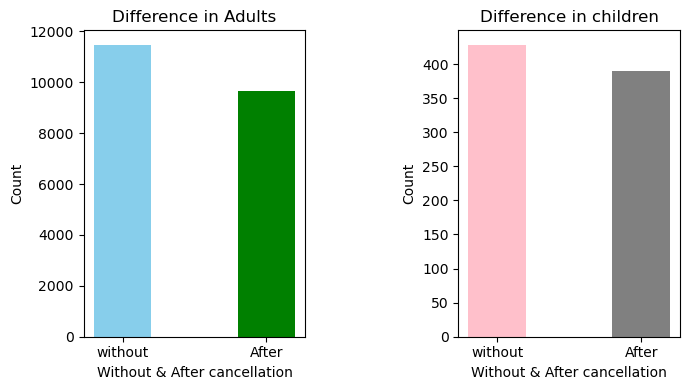

In [30]:
#2017

#Without(Before) Cancellation -- if the cancellation didn't happened
#Adults
adult_2017w=df[df["arrival_year"]==2017]["no_of_adults"].sum()
print("Adults stayed at hotel in 2017 without cancellation:",adult_2017w)
#Children
children_2017w=df[df["arrival_year"]==2017]["no_of_children"].sum()
print("Children stayed at hotel in 2017 without cancellation:",children_2017w)
#Total guests
total_guests_2017w=adult_2017w + children_2017w
print("Total number of guests stayed at hotel in 2017 without cancellation:",total_guests_2017w,"\n")


##After Cancellation
#Adults
adult_2017a=df[(df["arrival_year"]==2017)&(df["booking_status"]=="Not_Canceled")]["no_of_adults"].sum()
print("Adults stayed at hotel in 2017 after cancellation:",adult_2017a)
#Children
children_2017a=df[(df["arrival_year"]==2017)&(df["booking_status"]=="Not_Canceled")]["no_of_children"].sum()
print("Children stayed at hotel in 2017 after cancellation:",children_2017a)
#Total guests
total_guests_2017a=adult_2017a+children_2017a
print("Total number of guests stayed at hotel in 2017 after cancellation:",total_guests_2017a,"\n")

#Difference
differ_2017=total_guests_2017w - total_guests_2017a
print("Difference in stayed guests due to cancellation in 2017:",differ_2017,"\n")

#Plotting
year=["without","After"]
adult=[adult_2017w,adult_2017a]
children=[children_2017w,children_2017a]
total=[total_guests_2017w,total_guests_2017a]

fig,axes=plt.subplots(1,2,figsize=(7,4))

axes[0].bar(year,adult,color=["skyblue","green"],width=0.4)
axes[0].set_title("Difference in Adults")
axes[0].set_xlabel("Without & After cancellation")
axes[0].set_ylabel("Count")

axes[1].bar(year,children,color=["pink","grey"],width=0.4)
axes[1].set_title("Difference in children")
axes[1].set_xlabel("Without & After cancellation")
axes[1].set_ylabel("Count")

fig.tight_layout(w_pad=7)


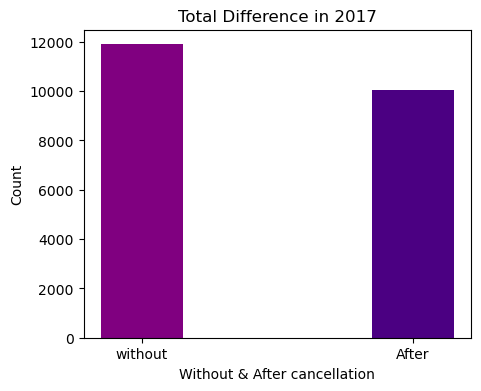

In [31]:
plt.figure(figsize=(5,4))
plt.bar(year,total,color=["purple","indigo"],width=0.3)
plt.title("Total Difference in 2017")
plt.xlabel("Without & After cancellation")
plt.ylabel("Count")
plt.show()

Adults stayed at hotel in 2018 without cancellation: 55462
Children stayed at hotel in 2018 without cancellation: 3391
Total number of guests stayed at hotel in 2018 without cancellation: 58853 

Adults stayed at hotel in 2018 after cancellation: 34583
Children stayed at hotel in 2018 after cancellation: 1951
Total number of guests stayed at hotel in 2018 after cancellation: 36534 

Difference in stayed guests due to cancellation in 2018: 22319


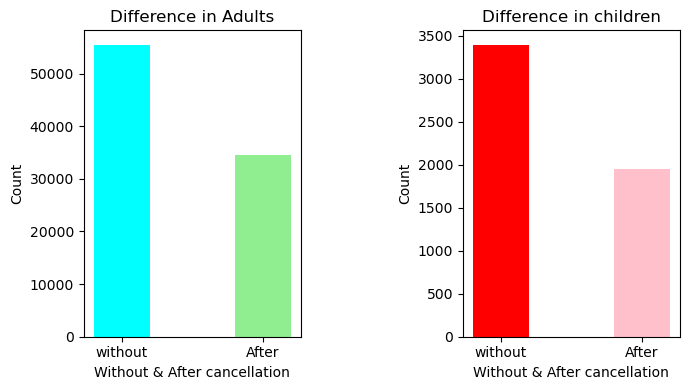

In [32]:
#2018

#Without(Before) Cancellation -- if the cancellation didn't happened
#Adults
adult_2018w=df[df["arrival_year"]==2018]["no_of_adults"].sum()
print("Adults stayed at hotel in 2018 without cancellation:",adult_2018w)
#Children
children_2018w=df[df["arrival_year"]==2018]["no_of_children"].sum()
print("Children stayed at hotel in 2018 without cancellation:",children_2018w)
#Total
total_guests_2018w=adult_2018w + children_2018w
print("Total number of guests stayed at hotel in 2018 without cancellation:",total_guests_2018w,"\n")

#After Cancellation
#Adults
adult_2018a=df[(df["arrival_year"]==2018)&(df["booking_status"]=="Not_Canceled")]["no_of_adults"].sum()
print("Adults stayed at hotel in 2018 after cancellation:",adult_2018a)
#Children
children_2018a=df[(df["arrival_year"]==2018)&(df["booking_status"]=="Not_Canceled")]["no_of_children"].sum()
print("Children stayed at hotel in 2018 after cancellation:",children_2018a)
#Total
total_guests_2018a=adult_2018a + children_2018a
print("Total number of guests stayed at hotel in 2018 after cancellation:",total_guests_2018a,"\n")

#Difference
differ_2018=total_guests_2018w - total_guests_2018a
print("Difference in stayed guests due to cancellation in 2018:",differ_2018)

year=["without","After"]
adult=[adult_2018w,adult_2018a]
children=[children_2018w,children_2018a]
total=[total_guests_2018w,total_guests_2018a]

fig,axes=plt.subplots(1,2,figsize=(7,4))

axes[0].bar(year,adult,color=["cyan","lightgreen"],width=0.4)
axes[0].set_title("Difference in Adults")
axes[0].set_xlabel("Without & After cancellation")
axes[0].set_ylabel("Count")

axes[1].bar(year,children,color=["red","pink"],width=0.4)
axes[1].set_title("Difference in children")
axes[1].set_xlabel("Without & After cancellation")
axes[1].set_ylabel("Count")

fig.tight_layout(w_pad=7)


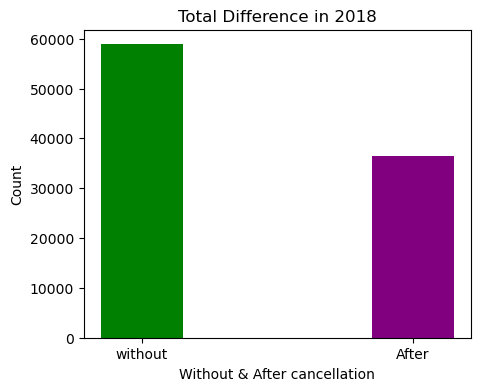

In [33]:
plt.figure(figsize=(5,4))
plt.bar(year,total,color=["green","purple"],width=0.3)
plt.title("Total Difference in 2018")
plt.xlabel("Without & After cancellation")
plt.ylabel("Count")
plt.show()

Total guests in 2 years without cancellation : 70745 

Total guests in 2 years after cancellation : 46572 

Overall Difference in stayed guests in 2 years due to cancellation: 24173 



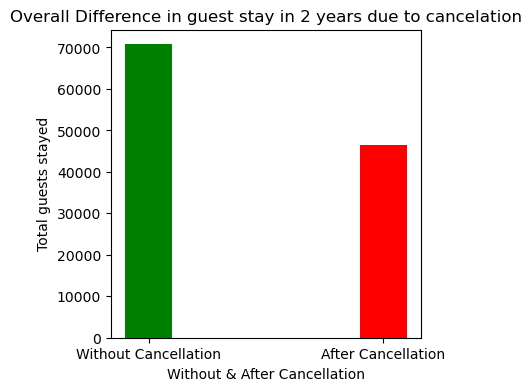

In [34]:
#Overall (2 years)

#Without Cancellation - If cancellation didn't happened
total_without_cancellation = total_guests_2017w + total_guests_2018w
print("Total guests in 2 years without cancellation :",total_without_cancellation,"\n")

#After Cancellation
total_after_cancellation = total_guests_2017a + total_guests_2018a
print("Total guests in 2 years after cancellation :",total_after_cancellation,"\n")

#Difference
diff=total_without_cancellation - total_after_cancellation
print("Overall Difference in stayed guests in 2 years due to cancellation:",diff,"\n")

#Plotting
plt.figure(figsize=(4,4))
diff=["Without Cancellation","After Cancellation"]
values=[total_without_cancellation,total_after_cancellation]
colors=["green","red"]
plt.bar(diff,values,width=0.2,color=colors)
plt.title("Overall Difference in guest stay in 2 years due to cancelation")
plt.xlabel("Without & After Cancellation")
plt.ylabel("Total guests stayed")
plt.show()

Overall 24,173 guests including adults and children cancelled their stay in the hotel

### Monthwise Cancellation Report

In [35]:
#2017
a7=df[(df["arrival_year"]==2017)&(df["arrival_month"]==7)&(df["booking_status"]=="Canceled")].count()
print("July 2017 cancellation:",a7.tail(1))
a8=df[(df["arrival_year"]==2017)&(df["arrival_month"]==8)&(df["booking_status"]=="Canceled")].count()
print("August 2017 cancellation:",a8.tail(1))
a9=df[(df["arrival_year"]==2017)&(df["arrival_month"]==9)&(df["booking_status"]=="Canceled")].count()
print("September 2017 cancellation:",a9.tail(1))
a10=df[(df["arrival_year"]==2017)&(df["arrival_month"]==10)&(df["booking_status"]=="Canceled")].count()
print("October 2017 cancellation:",a10.tail(1))
a11=df[(df["arrival_year"]==2017)&(df["arrival_month"]==11)&(df["booking_status"]=="Canceled")].count()
print("November 2017 cancellation:",a11.tail(1))
a12=df[(df["arrival_year"]==2017)&(df["arrival_month"]==12)&(df["booking_status"]=="Canceled")].count()
print("December 2017 cancellation:",a12.tail(1))

#2018
b1=df[(df["arrival_year"]==2018)&(df["arrival_month"]==1)&(df["booking_status"]=="Canceled")].count()
print("January 2018 cancellation:",b1.tail(1))
b2=df[(df["arrival_year"]==2018)&(df["arrival_month"]==2)&(df["booking_status"]=="Canceled")].count()
print("February 2018 cancellation:",b2.tail(1))
b3=df[(df["arrival_year"]==2018)&(df["arrival_month"]==3)&(df["booking_status"]=="Canceled")].count()
print("March 2018 cancellation:",b3.tail(1))
b4=df[(df["arrival_year"]==2018)&(df["arrival_month"]==4)&(df["booking_status"]=="Canceled")].count()
print("April 2018 cancellation:",b4.tail(1))
b5=df[(df["arrival_year"]==2018)&(df["arrival_month"]==5)&(df["booking_status"]=="Canceled")].count()
print("May 2018 cancellation:",b5.tail(1))
b6=df[(df["arrival_year"]==2018)&(df["arrival_month"]==6)&(df["booking_status"]=="Canceled")].count()
print("June 2018 cancellation:",b6.tail(1))
b7=df[(df["arrival_year"]==2018)&(df["arrival_month"]==7)&(df["booking_status"]=="Canceled")].count()
print("July 2018 cancellation:",b7.tail(1))
b8=df[(df["arrival_year"]==2018)&(df["arrival_month"]==8)&(df["booking_status"]=="Canceled")].count()
print("August 2018 cancellation:",b8.tail(1))
b9=df[(df["arrival_year"]==2018)&(df["arrival_month"]==9)&(df["booking_status"]=="Canceled")].count()
print("September 2018 cancellation:",b9.tail(1))
b10=df[(df["arrival_year"]==2018)&(df["arrival_month"]==10)&(df["booking_status"]=="Canceled")].count()
print("October 2018 cancellation:",b10.tail(1))
b11=df[(df["arrival_year"]==2018)&(df["arrival_month"]==11)&(df["booking_status"]=="Canceled")].count()
print("November 2018 cancellation:",b11.tail(1))
b12=df[(df["arrival_year"]==2018)&(df["arrival_month"]==12)&(df["booking_status"]=="Canceled")].count()
print("December 2018 cancellation:",b12.tail(1))

July 2017 cancellation: booking_status    243
dtype: int64
August 2017 cancellation: booking_status    185
dtype: int64
September 2017 cancellation: booking_status    182
dtype: int64
October 2017 cancellation: booking_status    302
dtype: int64
November 2017 cancellation: booking_status    27
dtype: int64
December 2017 cancellation: booking_status    22
dtype: int64
January 2018 cancellation: booking_status    24
dtype: int64
February 2018 cancellation: booking_status    430
dtype: int64
March 2018 cancellation: booking_status    700
dtype: int64
April 2018 cancellation: booking_status    995
dtype: int64
May 2018 cancellation: booking_status    948
dtype: int64
June 2018 cancellation: booking_status    1291
dtype: int64
July 2018 cancellation: booking_status    1071
dtype: int64
August 2018 cancellation: booking_status    1303
dtype: int64
September 2018 cancellation: booking_status    1356
dtype: int64
October 2018 cancellation: booking_status    1578
dtype: int64
November 2018 canc

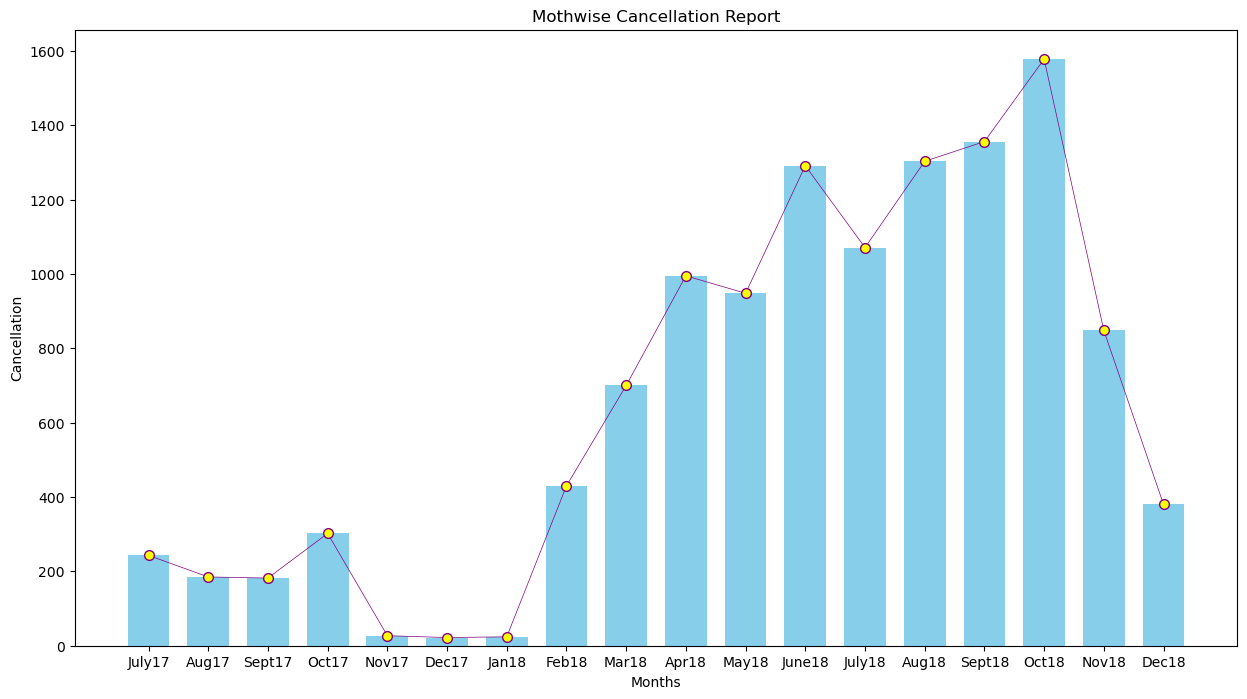

In [36]:
plt.figure(figsize=(15,8))
months=["July17","Aug17","Sept17","Oct17","Nov17","Dec17","Jan18","Feb18","Mar18","Apr18","May18","June18","July18","Aug18","Sept18","Oct18","Nov18","Dec18"]
#print(months)
monthwise_cancel=[243,185,182,302,27,22,24,430,700,995,948,1291,1071,1303,1356,1578,848,380]
#print(monthwise_cancel)
plt.bar(months,monthwise_cancel,width=0.7,color="skyblue")
plt.plot(months,monthwise_cancel,marker="o",lw=0.5,color="purple",ms=7,mfc="yellow")
plt.title("Mothwise Cancellation Report")
plt.xlabel("Months")
plt.ylabel("Cancellation")
plt.show()

It concludes that, 
* In December 2017 there are only 22 cancellations which is minimum than other months follwing January 2018 and November 2017.
* In October 2018 there are 1578 cancellations which is maximum than other months following September 2018 and August 2018

### Cancellation based on type of meal plan

In [37]:
group=df[df["booking_status"]=="Canceled"].groupby(df["type_of_meal_plan"])
group.count()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
type_of_meal_plan,,,,,,,,,,,,,,,,,,,
Meal Plan 1,8679,8679,8679,8679,8679,8679,8679,8679,8679,8679,8679,8679,8679,8679,8679,8679,8679,8679,8679
Meal Plan 2,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506
Meal Plan 3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Not Selected,1699,1699,1699,1699,1699,1699,1699,1699,1699,1699,1699,1699,1699,1699,1699,1699,1699,1699,1699


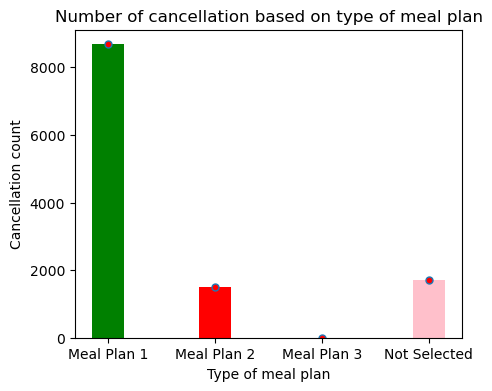

In [38]:
plt.figure(figsize=(5,4))
year=["Meal Plan 1","Meal Plan 2","Meal Plan 3","Not Selected"]
cancel=[8679,1506,1,1699]
colors=["green","red","yellow","pink"]
plt.bar(year,cancel,width=0.3,color=colors)
plt.plot(year,cancel,marker="o",lw=0,ms=5,mfc="red")
plt.title("Number of cancellation based on type of meal plan")
plt.xlabel("Type of meal plan")
plt.ylabel("Cancellation count")
plt.show()

 Guests who had choosed Meal type 1 plan cancelled their bookings more than the others follow by Not Selected type guests

### Cancellation count per year.

In [39]:
group=df[df["booking_status"]=="Canceled"].groupby(df["arrival_year"])
group.count()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
arrival_year,,,,,,,,,,,,,,,,,,,
2017,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961,961
2018,10924,10924,10924,10924,10924,10924,10924,10924,10924,10924,10924,10924,10924,10924,10924,10924,10924,10924,10924


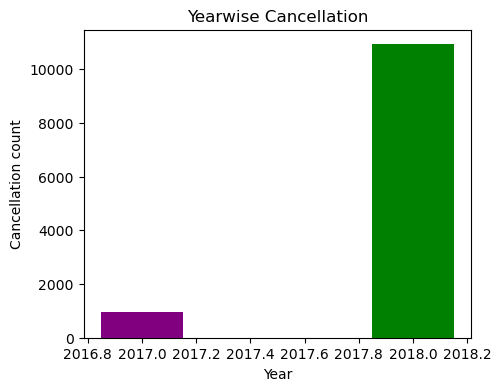

In [40]:
plt.figure(figsize=(5,4))
year=[2017,2018]
cancel=[961,10924]
colors=["purple","green"]
plt.bar(year,cancel,width=0.3,color=colors)
#plt.plot(year,cancel,marker="o",lw=0,ms=5,mfc="red")
plt.title("Yearwise Cancellation")
plt.xlabel("Year")
plt.ylabel("Cancellation count")
plt.show()

 There are 961 cancellations happened in 2017.But at 2018,there are 10924 cancellations happened. That was more than 10 times when we compare it to the previous year.

### Booking status counts

In [41]:
df["booking_status"].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

<Axes: xlabel='booking_status', ylabel='count'>

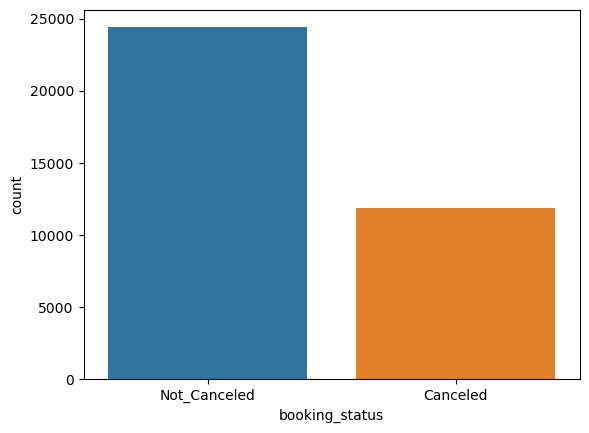

In [42]:
sns.countplot(x="booking_status",data=df)

### Cancellation based on market segment type

In [43]:
group=df[df["booking_status"]=="Canceled"].groupby(df["market_segment_type"])
group.count()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
market_segment_type,,,,,,,,,,,,,,,,,,,
Aviation,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
Corporate,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220
Offline,3153,3153,3153,3153,3153,3153,3153,3153,3153,3153,3153,3153,3153,3153,3153,3153,3153,3153,3153
Online,8475,8475,8475,8475,8475,8475,8475,8475,8475,8475,8475,8475,8475,8475,8475,8475,8475,8475,8475


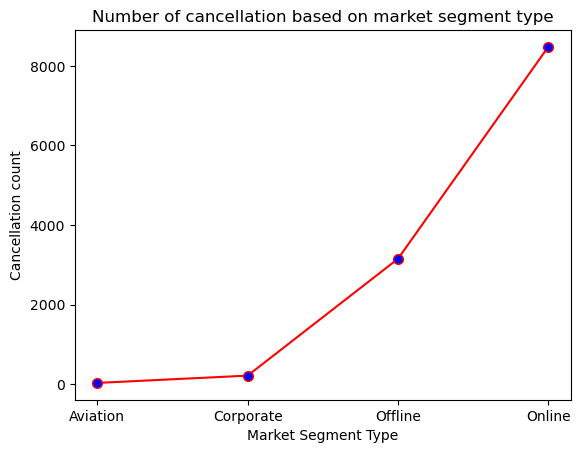

In [44]:
types=["Aviation","Corporate","Offline","Online"]
cancelled=[37,220,3153,8475]
plt.plot(types,cancelled,marker="o",ms=7,mfc="blue",color="red")
plt.title("Number of cancellation based on market segment type")
plt.xlabel("Market Segment Type")
plt.ylabel("Cancellation count")
plt.show()

Online booking has the highest number of cancellations compared to the other market segment types

### Number of repeated guests cancelled their  bookings

In [45]:
df["repeated_guest"].value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

In [46]:
group=df[df["booking_status"]=="Canceled"].groupby(df["repeated_guest"])
group.count()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
repeated_guest,,,,,,,,,,,,,,,,,,,
0,11869,11869,11869,11869,11869,11869,11869,11869,11869,11869,11869,11869,11869,11869,11869,11869,11869,11869,11869
1,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16


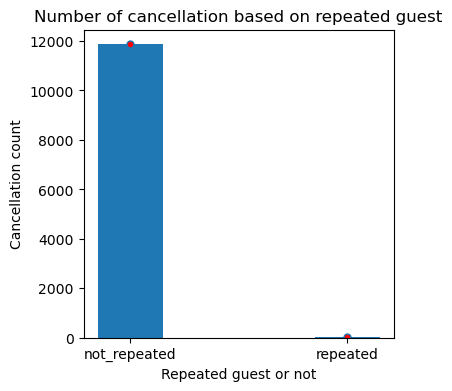

In [47]:
plt.figure(figsize=(4,4))
types=["not_repeated","repeated"]
cancelled=[11869,16]
#colors=["red","green","purple","pink"]
plt.bar(types,cancelled,width=0.3)
plt.plot(types,cancelled,marker="o",lw=0,ms=5,mfc="red")
plt.title("Number of cancellation based on repeated guest")
plt.xlabel("Repeated guest or not")
plt.ylabel("Cancellation count")
plt.show()

Out of 930 repeated customers,only 16 of them cancelled their bookings.

### Categorical data visualization with hue difference of Arrival Year

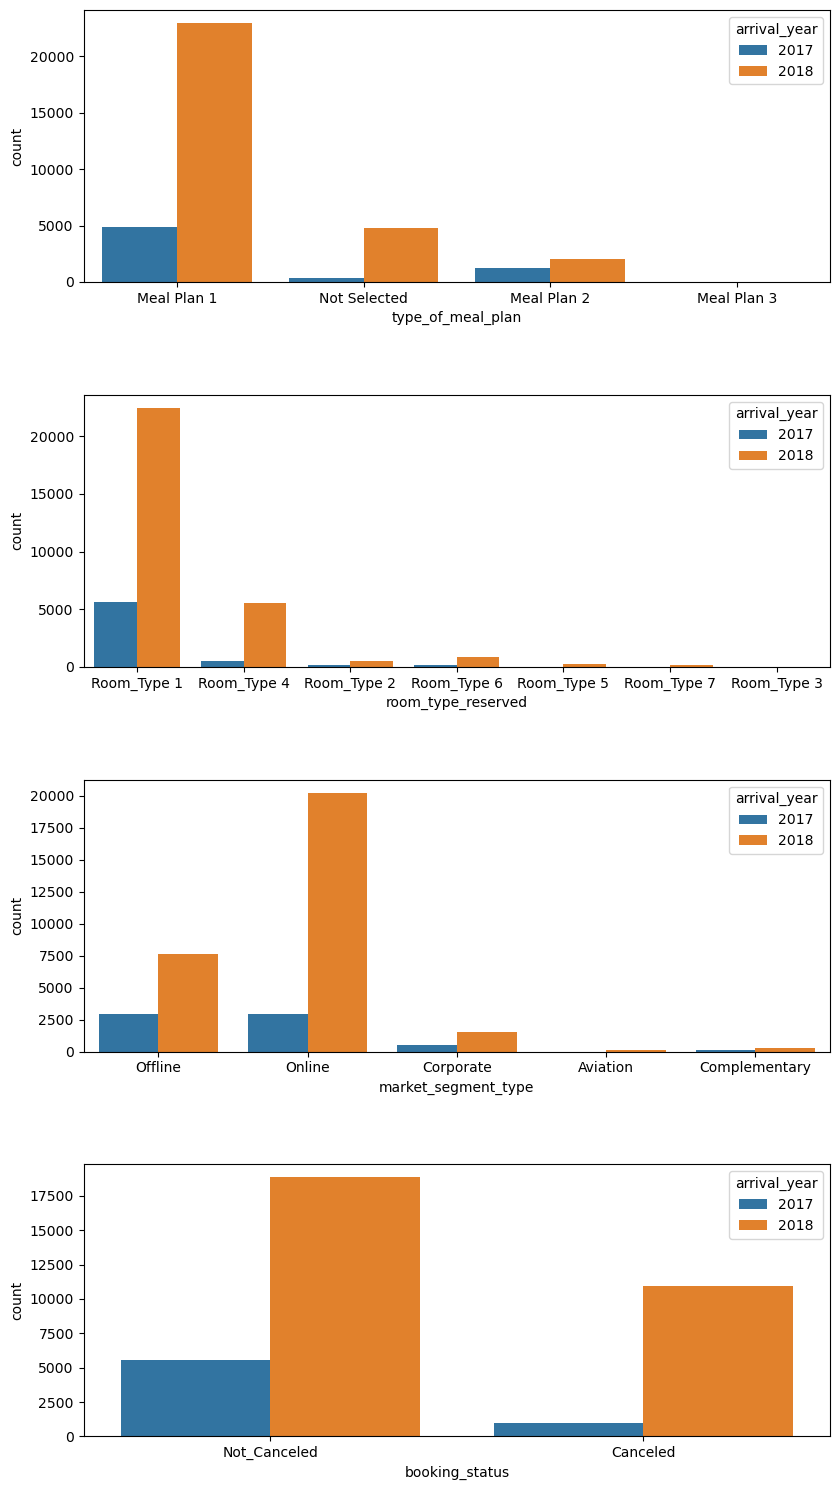

In [48]:
cols=df.drop(columns=["Booking_ID","no_of_adults","no_of_children","no_of_weekend_nights","no_of_week_nights","required_car_parking_space","lead_time","arrival_year",
                     "arrival_month","arrival_date","repeated_guest","no_of_previous_cancellations","no_of_previous_bookings_not_canceled","avg_price_per_room","no_of_special_requests"])

fig,ax=plt.subplots(ncols=1,nrows=4,figsize=(8.5,15))
index=0
ax=ax.flatten()

for col in cols:
    sns.countplot(x=col,data=cols,ax=ax[index],hue=df["arrival_year"])
    index+=1
fig.tight_layout(h_pad=5)
plt.show()

###  Data visualization with hue difference of booking status

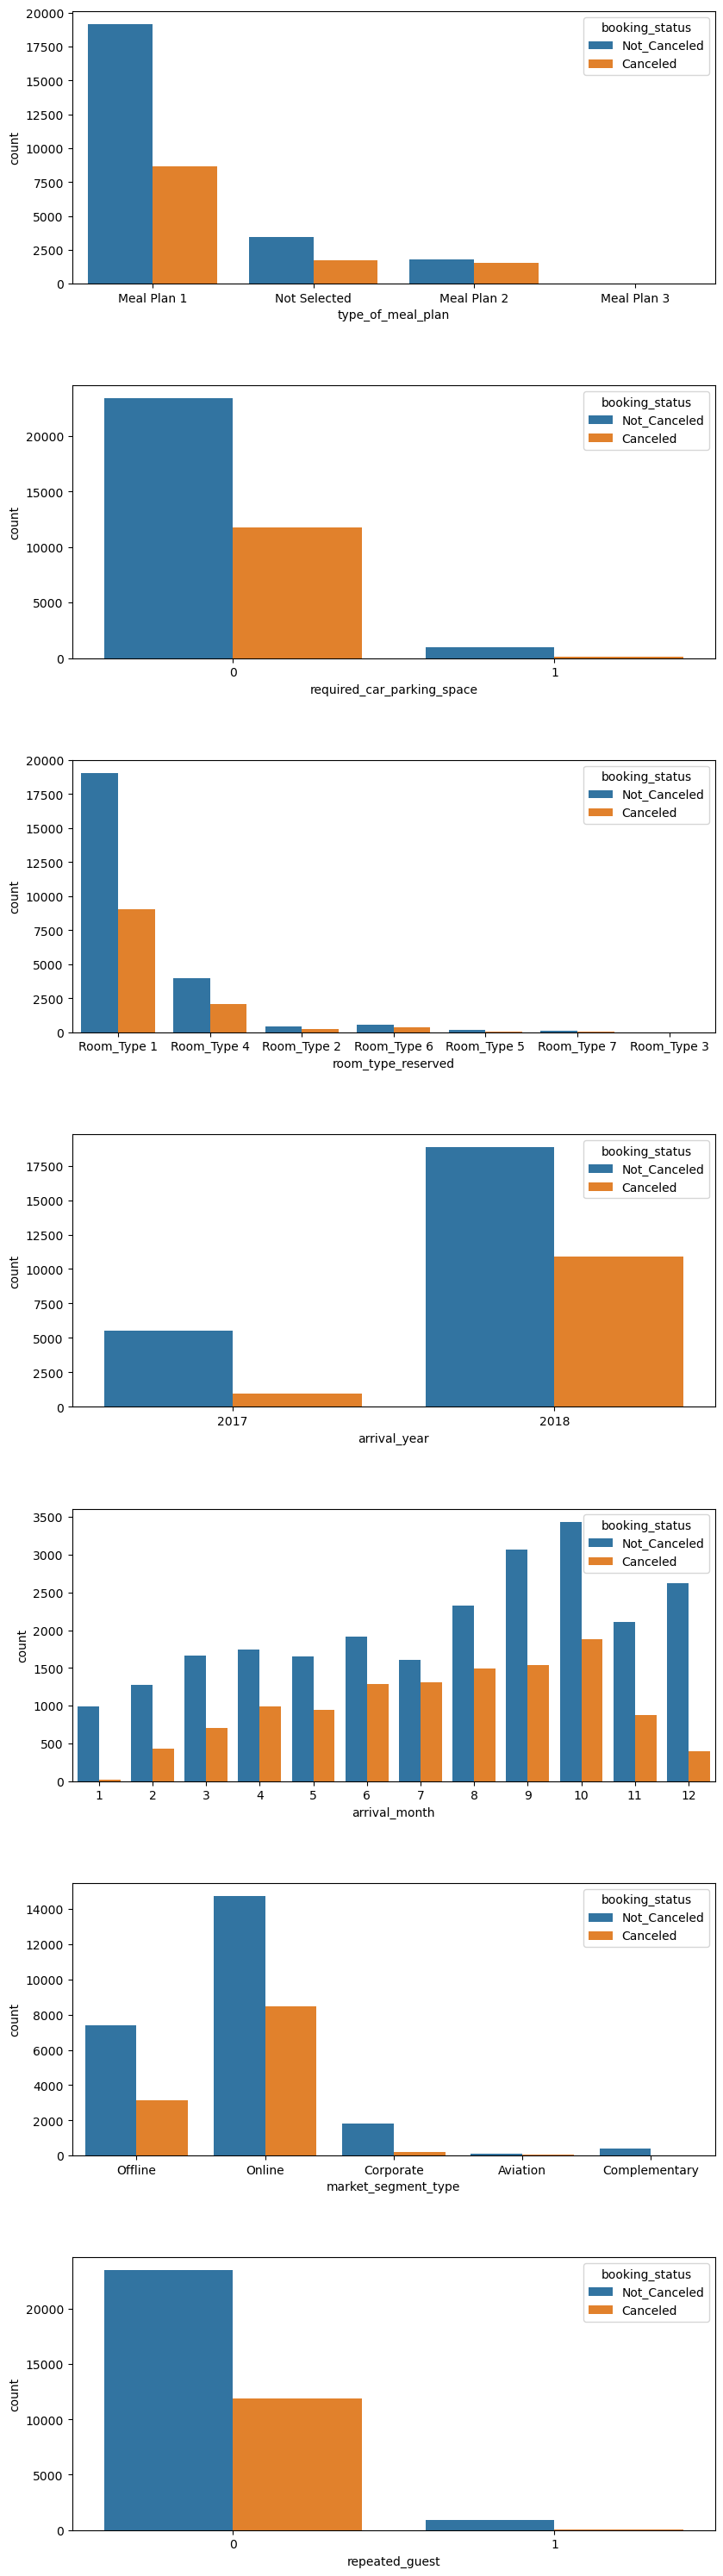

In [49]:
cols=df.drop(columns=["Booking_ID","no_of_adults","no_of_children","no_of_weekend_nights","no_of_week_nights","lead_time","arrival_date",
                     "no_of_previous_cancellations","no_of_previous_bookings_not_canceled","avg_price_per_room","no_of_special_requests","booking_status"])

fig,ax=plt.subplots(ncols=1,nrows=7,figsize=(8.5,30))
index=0
ax=ax.flatten()

for col in cols:
    sns.countplot(x=col,data=cols,ax=ax[index],hue=df["booking_status"])
    index+=1
fig.tight_layout(h_pad=5)
plt.show()

### Numerical data visualization

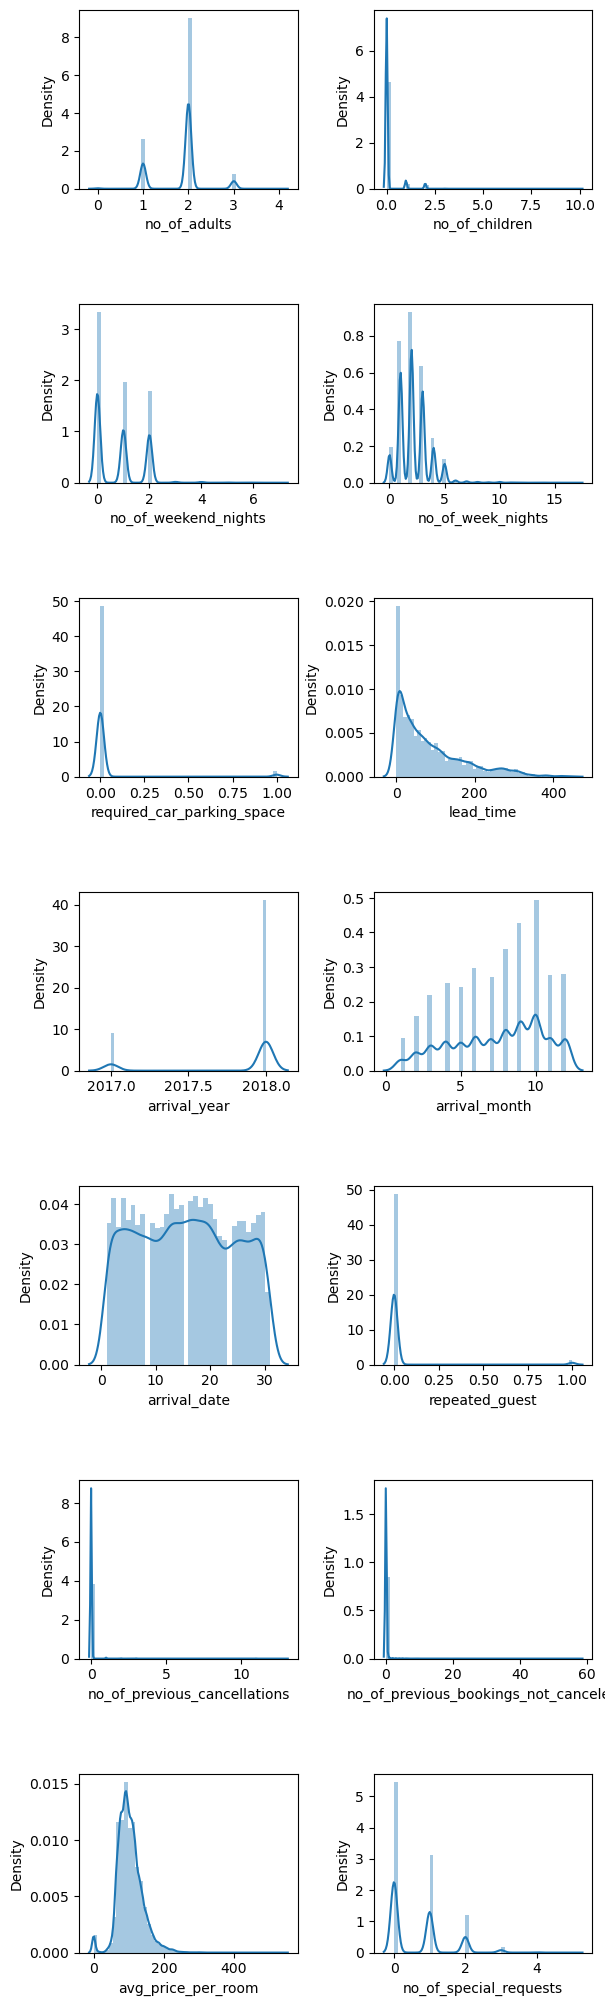

In [50]:
cols=df.drop(columns=["Booking_ID","type_of_meal_plan","room_type_reserved","market_segment_type","booking_status"])
#cols

fig,ax=plt.subplots(ncols=2,nrows=7,figsize=(6,20))
index=0
ax=ax.flatten()

for col in cols:
    sns.distplot(cols[col],ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=5)
plt.show()


### Coorelation Matrix

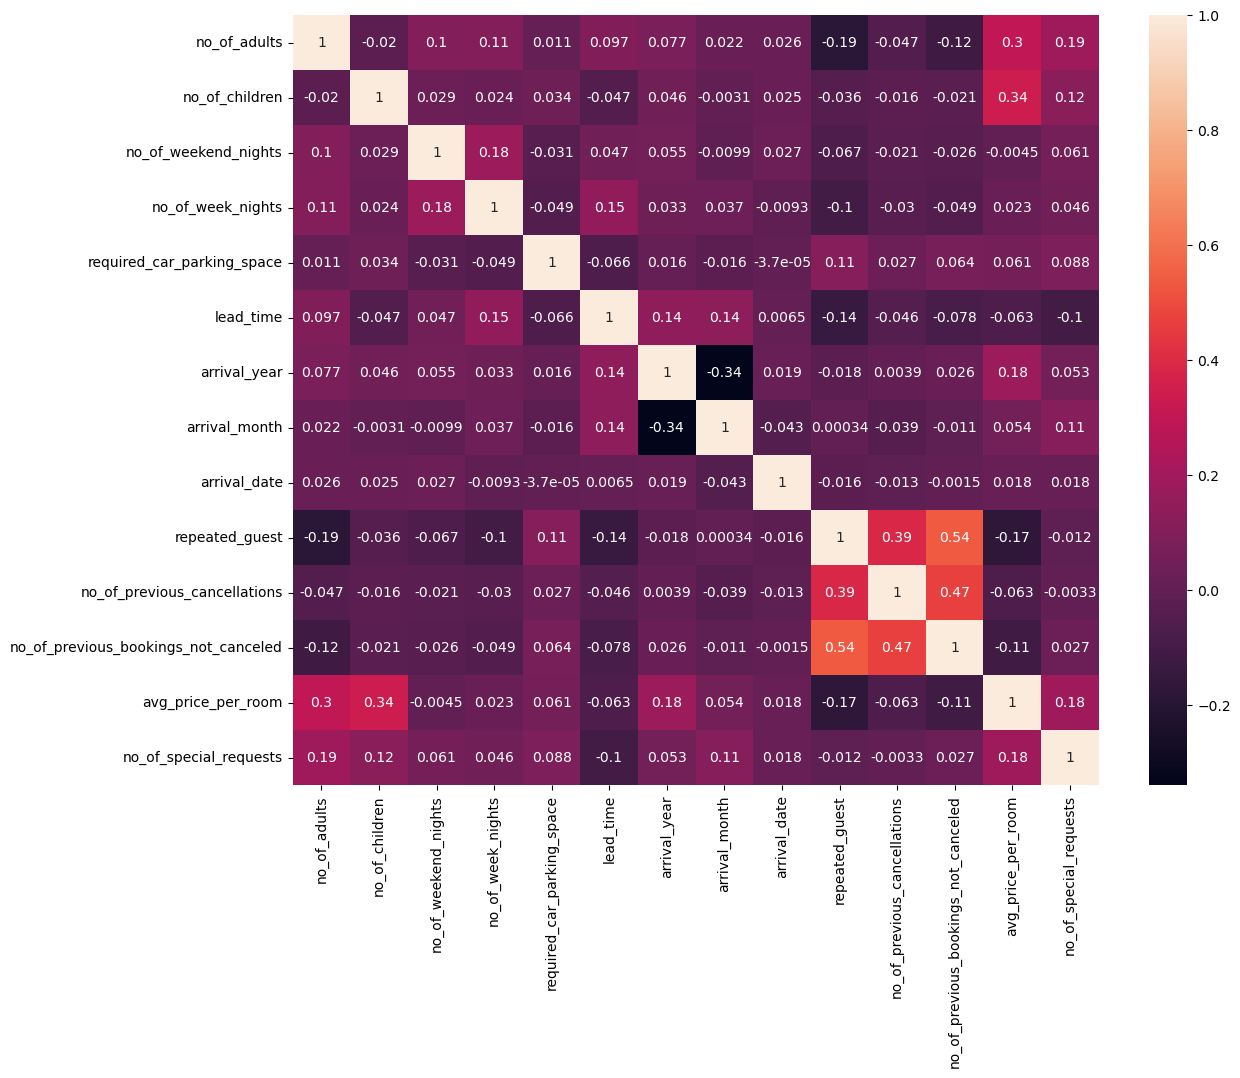

In [51]:
plt.figure(figsize=(13,10))
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

## Data Preprocessing

### Label Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
cols=["Booking_ID","type_of_meal_plan","room_type_reserved","market_segment_type","booking_status","arrival_year"]
le=LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [54]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,1,2,0,0,0,224,0,10,2,3,0,0,0,65.00,0,1
1,1,2,0,2,3,3,0,0,5,1,11,6,4,0,0,0,106.68,1,1
2,2,1,0,2,1,0,0,0,1,1,2,28,4,0,0,0,60.00,0,0
3,3,2,0,0,2,0,0,0,211,1,5,20,4,0,0,0,100.00,0,0
4,4,2,0,1,1,3,0,0,48,1,4,11,4,0,0,0,94.50,0,0


Now that all the categorical features are converted into numerical values, we can genereate a ne coorelation matrix 

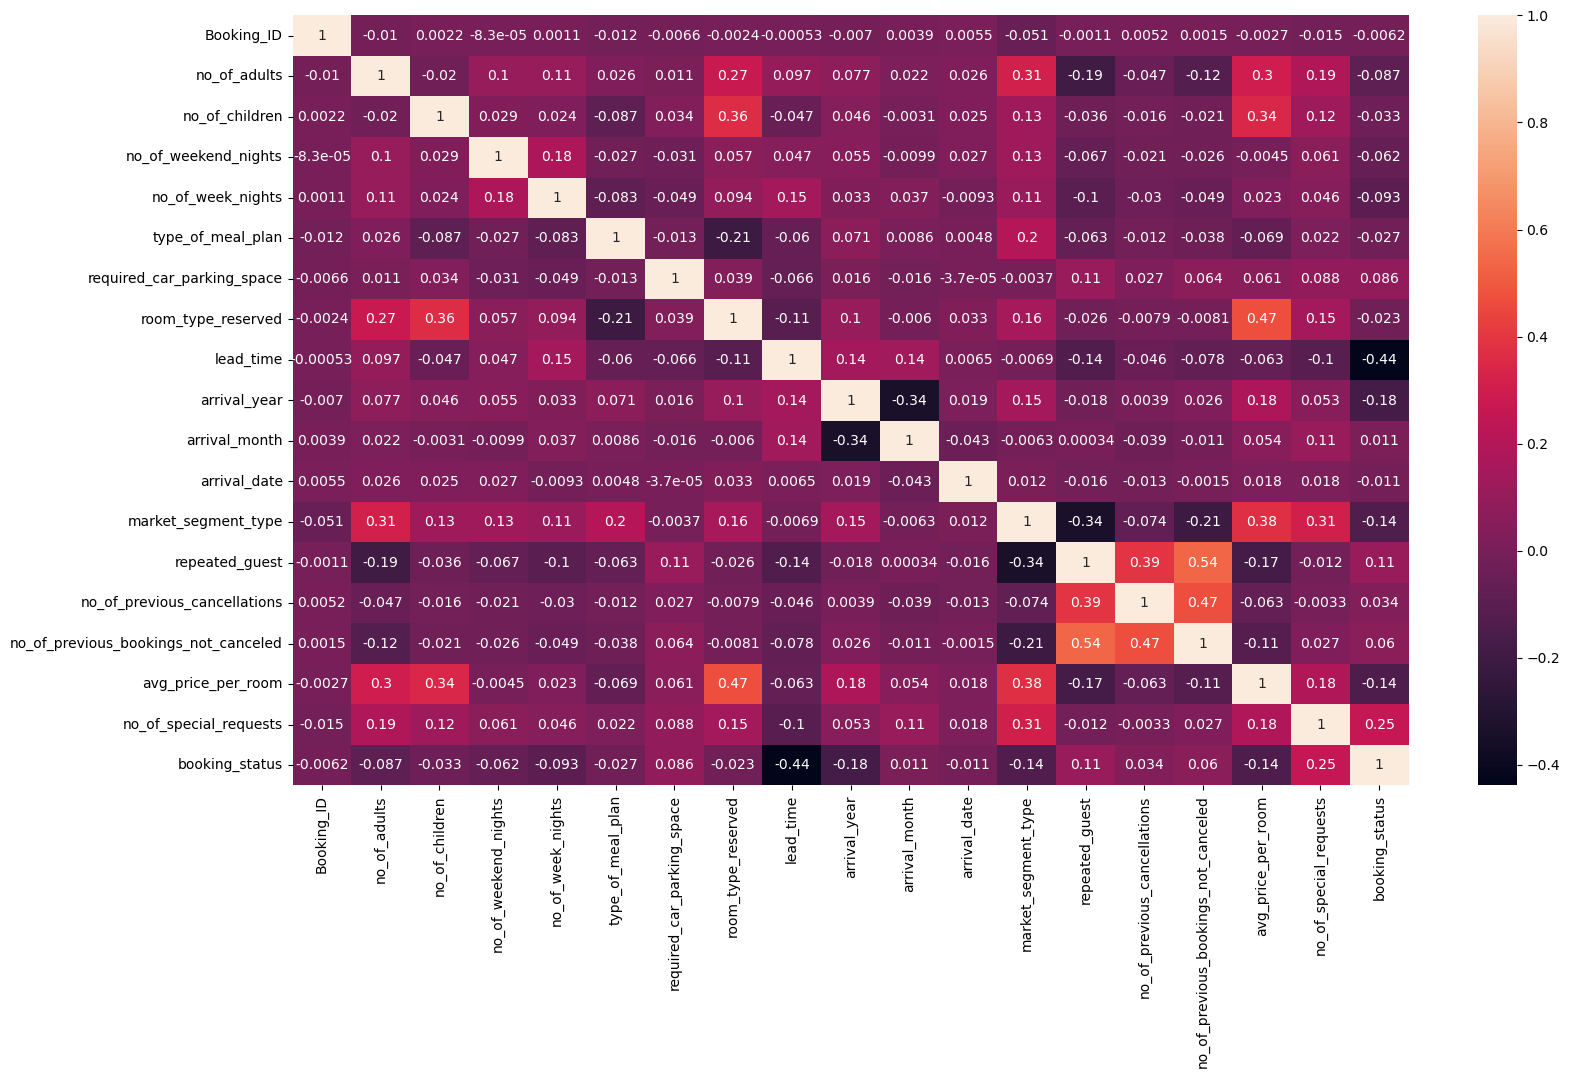

In [55]:
plt.figure(figsize=(18,10))
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

## Split the data into test and train data

In [56]:
x=df.drop(columns=["booking_status"])
x

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0,2,0,1,2,0,0,0,224,0,10,2,3,0,0,0,65.00,0
1,1,2,0,2,3,3,0,0,5,1,11,6,4,0,0,0,106.68,1
2,2,1,0,2,1,0,0,0,1,1,2,28,4,0,0,0,60.00,0
3,3,2,0,0,2,0,0,0,211,1,5,20,4,0,0,0,100.00,0
4,4,2,0,1,1,3,0,0,48,1,4,11,4,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,36270,3,0,2,6,0,0,3,85,1,8,3,4,0,0,0,167.80,1
36271,36271,2,0,1,3,0,0,0,228,1,10,17,4,0,0,0,90.95,2
36272,36272,2,0,2,6,0,0,0,148,1,7,1,4,0,0,0,98.39,2
36273,36273,2,0,0,3,3,0,0,63,1,4,21,4,0,0,0,94.50,0


In [57]:
y=df["booking_status"]
y

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36275, dtype: int32

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [60]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (27206, 18)
x_test shape: (9069, 18)
y_train shape: (27206,)
y_test shape: (9069,)


## Model Building

In [61]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [62]:
models=[] # To store the model names
scores=[] # To store the accuracy score of the model

def classify(model,x,y):
    model.fit(x_train,y_train)
    #prediction
    y_predict=model.predict(x_test)
    #Evaluation
    #Accuracy
    Accuracy=round(model.score(x_test,y_test)*100,3)
    print("Accuracy is:",Accuracy,"\n")
    #Cross Validation
    score=cross_val_score(model,x,y,cv=5)
    print("Cross validation score:",np.mean(score)*100,"\n")
    #Classification Report
    report=metrics.classification_report(y_test,y_predict)
    print("Classification Report:\n",report,"\n")
    #Confusion Matrix
    matrix=metrics.confusion_matrix(y_test,y_predict)
    print("Confusion Matrix:\n",matrix,"\n")
    #Heatmap for confusion matrix
    plt.figure(figsize=(4,3))
    sns.heatmap(matrix,annot=True)
    plt.show()
    
    #Append model name and accuracy to models and scores list
    models.append(model)
    scores.append(Accuracy)
    #return Accuracy

### LogisticRegression

Accuracy is: 75.334 

Cross validation score: 74.58028945554791 

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.44      0.54      2958
           1       0.77      0.91      0.83      6111

    accuracy                           0.75      9069
   macro avg       0.73      0.67      0.68      9069
weighted avg       0.74      0.75      0.74      9069
 

Confusion Matrix:
 [[1295 1663]
 [ 574 5537]] 



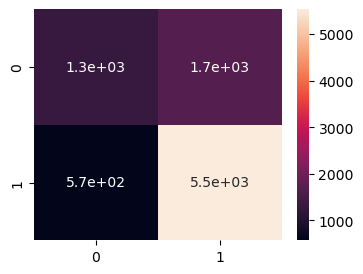

In [63]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
classify(log_model,x,y)

### KNN Algorithm

In [64]:
#Findin best K values

In [65]:
from sklearn.neighbors import KNeighborsClassifier
#Error Rate
error_rate=[]
for i in range(1,30):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    error_rate.append(np.mean(y_predict!=y_test))

Text(0, 0.5, 'Error Rate')

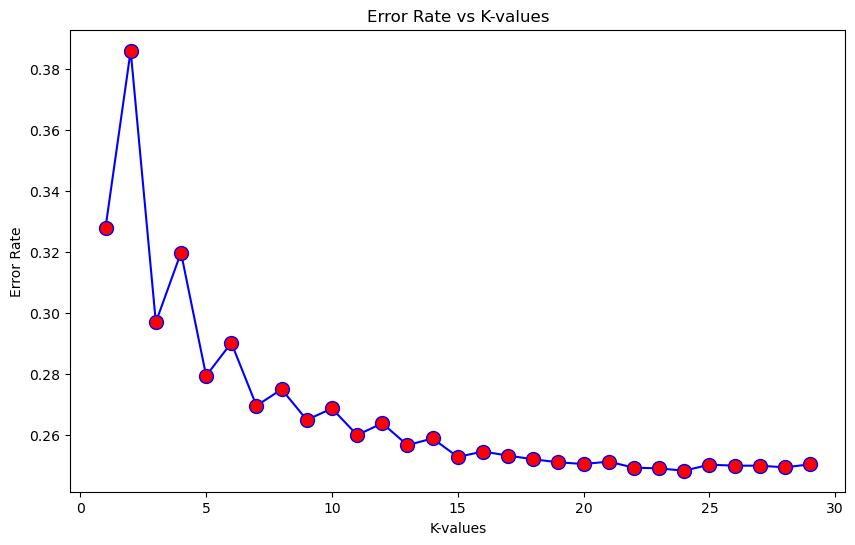

In [66]:
#Error rate vs K-values

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color="blue",marker="o",mfc="red",markersize=10)
plt.title("Error Rate vs K-values")
plt.xlabel("K-values")
plt.ylabel("Error Rate")

Accuracy is: 75.168 

Cross validation score: 49.684355616815985 

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.43      0.53      2958
           1       0.77      0.91      0.83      6111

    accuracy                           0.75      9069
   macro avg       0.73      0.67      0.68      9069
weighted avg       0.74      0.75      0.73      9069
 

Confusion Matrix:
 [[1258 1700]
 [ 552 5559]] 



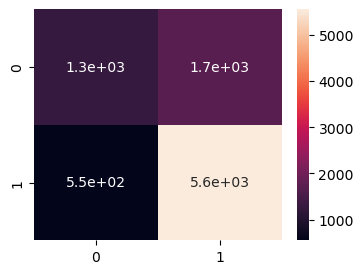

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=24)
classify(knn_model,x,y)

### RandomForestClassifier

Accuracy is: 89.822 

Cross validation score: 89.08890420399726 

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      2958
           1       0.91      0.94      0.93      6111

    accuracy                           0.90      9069
   macro avg       0.89      0.87      0.88      9069
weighted avg       0.90      0.90      0.90      9069
 

Confusion Matrix:
 [[2383  575]
 [ 348 5763]] 



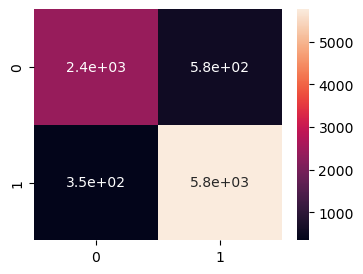

In [68]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
classify(model,x,y)

### DecisionTreeClassifier

Accuracy is: 85.621 

Cross validation score: 84.07994486560992 

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      2958
           1       0.89      0.89      0.89      6111

    accuracy                           0.86      9069
   macro avg       0.84      0.84      0.84      9069
weighted avg       0.86      0.86      0.86      9069
 

Confusion Matrix:
 [[2302  656]
 [ 648 5463]] 



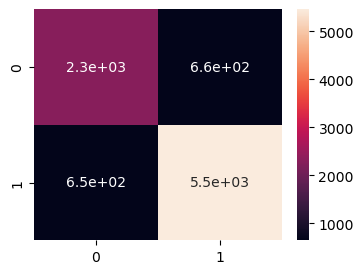

In [69]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model,x,y)

### ExtraTreesClassifier

Accuracy is: 89.657 

Cross validation score: 89.2129565816678 

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83      2958
           1       0.91      0.94      0.92      6111

    accuracy                           0.90      9069
   macro avg       0.89      0.87      0.88      9069
weighted avg       0.90      0.90      0.90      9069
 

Confusion Matrix:
 [[2371  587]
 [ 351 5760]] 



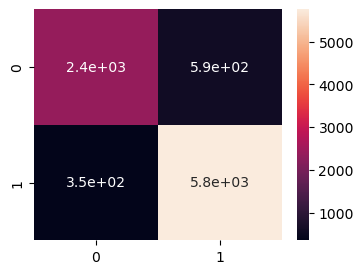

In [70]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
classify(model,x,y)

### SVC

Accuracy is: 67.383 

Cross validation score: 67.23638869745004 

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2958
           1       0.67      1.00      0.81      6111

    accuracy                           0.67      9069
   macro avg       0.34      0.50      0.40      9069
weighted avg       0.45      0.67      0.54      9069
 

Confusion Matrix:
 [[   0 2958]
 [   0 6111]] 



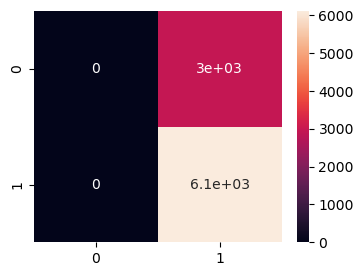

In [71]:
from sklearn.svm import SVC
model=SVC(kernel="rbf")
classify(model,x,y)

### XGBClasssifier

Accuracy is: 88.863 

Cross validation score: 86.64645072363888 

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82      2958
           1       0.90      0.93      0.92      6111

    accuracy                           0.89      9069
   macro avg       0.88      0.86      0.87      9069
weighted avg       0.89      0.89      0.89      9069
 

Confusion Matrix:
 [[2354  604]
 [ 406 5705]] 



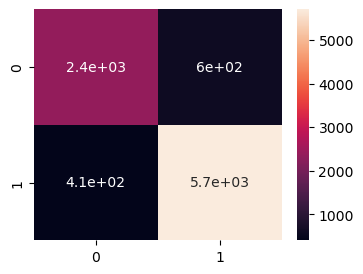

In [72]:
from xgboost import XGBClassifier
model=XGBClassifier(n_jobs=1)
classify(model,x,y)

## Model Comparision

In [73]:
print(models)
print(scores)

[LogisticRegression(), KNeighborsClassifier(n_neighbors=24), RandomForestClassifier(), DecisionTreeClassifier(), ExtraTreesClassifier(), SVC(), XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=1,
              num_parallel_tree=None, random_state=None, ...)]
[75.334, 75.168, 89.822, 85.621, 89.657, 67.383, 88.863]


 1 : LogisticRegression()     :  75.334
 2 : KNeighborsClassifier()   :  75.168
 3 : RandomForestClassifier() :  89.822
 4 : DecisionTreeClassifier() :  85.621
 5 : ExtraTreesClassifier()   :  89.657
 6 : SVC()                    :  67.383
 7 : XGBClassifier()          :  88.863


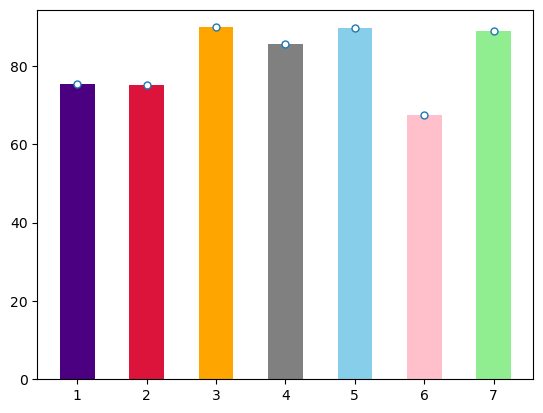

In [74]:
a=[1,2,3,4,5,6,7]
print(" 1 : LogisticRegression()     : ",scores[0])
print(" 2 : KNeighborsClassifier()   : ",scores[1])
print(" 3 : RandomForestClassifier() : ",scores[2])
print(" 4 : DecisionTreeClassifier() : ",scores[3])
print(" 5 : ExtraTreesClassifier()   : ",scores[4])
print(" 6 : SVC()                    : ",scores[5])
print(" 7 : XGBClassifier()          : ",scores[6])
b=scores
colors=["indigo","crimson","orange","grey","skyblue","pink","lightgreen"]
plt.bar(a,b,color=colors,width=0.5)
plt.plot(a,b,marker="o",lw=0,ms=5,mfc="white")
plt.show()

From the above comparision we can clearly see that the RandomForestClaasifier algorithm gives us more accuracy than the other algorithms.

## Hyperparameter Tuning

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200]  
}

rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)  
grid_search.fit(x_train, y_train) 
best_n_estimators = grid_search.best_params_['n_estimators']
print("best_n_estimator : ",best_n_estimators,"\n")
y_pred=grid_search.predict(x_test)
#Accuracy
accuracy=grid_search.score(x_test,y_test)*100
print("Accuracy_score:",accuracy)
#Classification Report
report=metrics.classification_report(y_test,y_pred)
print("Classification Report:\n",report,"\n")
#Confusion Matrix
matrix=metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",matrix,"\n")

best_n_estimator :  100 

Accuracy_score: 90.16429595324733
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      2958
           1       0.91      0.95      0.93      6111

    accuracy                           0.90      9069
   macro avg       0.90      0.88      0.89      9069
weighted avg       0.90      0.90      0.90      9069
 

Confusion Matrix:
 [[2392  566]
 [ 326 5785]] 



After Hyperparameter Tuning,we can see that the Accuracy of the RandomForestClassifier model slightly improved.